<a href="https://colab.research.google.com/github/totti0223/deep_learning_for_biologists_with_keras/blob/master/notebooks/flower_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#17 flowers dataset classification

![17_flowers](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/categories.jpg =300x600)

## Library Import

In [0]:
import os
import shutil
from more_itertools import chunked
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import keras
from keras.utils.data_utils import get_file
from keras.utils import to_categorical
from keras import layers
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

##Dataset Preparation

### Download

In [1]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
!tar -zxf 17flowers.tgz

--2019-01-15 09:43:25--  http://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60270631 (57M) [application/x-gzip]
Saving to: ‘17flowers.tgz’

17flowers.tgz       100%[===================>]  57.48M  22.5MB/s    in 2.6s    

2019-01-15 09:43:33 (22.5 MB/s) - ‘17flowers.tgz’ saved [60270631/60270631]



In [3]:
#get list of files
_files = os.listdir("jpg")
#jpg only
_files = sorted([x for x in _files if x.endswith(".jpg")])

#to groups of 80
grouped_files = list(chunked(_files,80))

#create parent directory
parent_dir = "image"
if os.path.exists(parent_dir) == False:
    os.mkdir(parent_dir)
    
#create subfolder
labels = ['Daffodil', 'Snowdrop', 'LilyValley', 'Bluebell', 'Crocus', 'Iris', 'Tigerlily', 'Tulip', 'Fritillary', 'Sunflower', 'Daisy', 'ColtsFoot', 'Dandelion', 'Cowslip', 'Buttercup', 'Windflower', 'Pansy']
print ("creating data for: ",labels)
for label in labels:
    subfolder = os.path.join(parent_dir,label)
    if os.path.exists(subfolder) == False:
        os.mkdir(subfolder)
#copy files to subfolders
for i,files in enumerate(grouped_files):
    for file in files:
        orig = os.path.join("jpg",file)
        dest = os.path.join(parent_dir,labels[i],file)
        shutil.copy2(orig,dest)

creating data for:  ['Daffodil', 'Snowdrop', 'LilyValley', 'Bluebell', 'Crocus', 'Iris', 'Tigerlily', 'Tulip', 'Fritillary', 'Sunflower', 'Daisy', 'ColtsFoot', 'Dandelion', 'Cowslip', 'Buttercup', 'Windflower', 'Pansy']


In [38]:
# here is how the organized folder look like.
for root, dirs, files in os.walk("image"):
    print(root)
    print(files)

image
[]
image/Bluebell
['image_0241.jpg', 'image_0266.jpg', 'image_0315.jpg', 'image_0304.jpg', 'image_0277.jpg', 'image_0249.jpg', 'image_0297.jpg', 'image_0298.jpg', 'image_0319.jpg', 'image_0296.jpg', 'image_0274.jpg', 'image_0309.jpg', 'image_0269.jpg', 'image_0242.jpg', 'image_0267.jpg', 'image_0268.jpg', 'image_0307.jpg', 'image_0247.jpg', 'image_0312.jpg', 'image_0299.jpg', 'image_0243.jpg', 'image_0285.jpg', 'image_0316.jpg', 'image_0248.jpg', 'image_0275.jpg', 'image_0261.jpg', 'image_0290.jpg', 'image_0317.jpg', 'image_0262.jpg', 'image_0258.jpg', 'image_0253.jpg', 'image_0244.jpg', 'image_0265.jpg', 'image_0318.jpg', 'image_0246.jpg', 'image_0288.jpg', 'image_0306.jpg', 'image_0314.jpg', 'image_0279.jpg', 'image_0264.jpg', 'image_0252.jpg', 'image_0270.jpg', 'image_0283.jpg', 'image_0245.jpg', 'image_0286.jpg', 'image_0276.jpg', 'image_0289.jpg', 'image_0272.jpg', 'image_0259.jpg', 'image_0300.jpg', 'image_0291.jpg', 'image_0308.jpg', 'image_0292.jpg', 'image_0305.jpg', 'im

### Dataset Preview

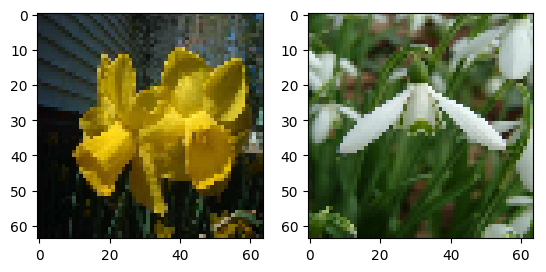

In [39]:
plt.subplot(1,2,1)
img = load_img("image/Daffodil/image_0020.jpg",target_size=(64,64))
x = img_to_array(img)/255.
plt.imshow(x)

plt.subplot(1,2,2)
img = load_img("image/Snowdrop/image_0082.jpg",target_size=(64,64))
x = img_to_array(img)/255.
plt.imshow(x)
plt.show()

### Load everything into memory

In [40]:
x = []
y = []
labels = ['Daffodil', 'Snowdrop', 'LilyValley', 'Bluebell', 'Crocus', 'Iris', 'Tigerlily', 'Tulip', 'Fritillary', 'Sunflower', 'Daisy', 'ColtsFoot', 'Dandelion', 'Cowslip', 'Buttercup', 'Windflower', 'Pansy']

for i,label in enumerate(labels):
    folder = os.path.join("image",label)
    files = sorted(os.listdir(folder))
    files = [x for x in files if x.endswith(".jpg")]
    for k,file in enumerate(files):
        img_path = os.path.join(folder,file)
        img = load_img(img_path,target_size=(64,64))
        img = img_to_array(img)/255.
        x.append(img)
        y.append(i)

x = np.array(x)
y = np.array(y)       
y = to_categorical(y)

train_x, valid_x, train_y, valid_y = train_test_split(x,y,random_state=1,test_size=0.2)

print(train_x.shape,train_y.shape)
print(valid_x.shape,valid_y.shape)

(1088, 64, 64, 3) (1088, 17)
(272, 64, 64, 3) (272, 17)


## *de novo* CNN training

In [0]:
#VGG16 architecture with batchnormalization and dropout
model = Sequential([
    #feature extraction layer
    
    #block1
    layers.Conv2D(64,(3,3),padding="same",name="block1_conv1",input_shape=(64,64,3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64,(3,3),padding="same",name="block1_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block1_pool"),
    #block2
    layers.Conv2D(128,(3,3),padding="same",name="block2_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(128,(3,3),padding="same",name="block2_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block2_pool"),
    #block3
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(256,(3,3),padding="same",name="block3_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block3_pool"),

    #block4
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block4_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block4_pool"),

    #block5
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512,(3,3),padding="same",name="block5_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block5_pool"),

    layers.Flatten(),
    
    #inference layer
    layers.Dense(512,name="fc1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),
    
    layers.Dense(512,name="fc2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),    
    layers.Dropout(0.5),
    
    layers.Dense(17,name="prepredictions"),
    layers.Activation("softmax",name="predictions")
    
])

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
batch_normalization_61 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
activation_64 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_62 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
activation_65 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
__________

In [43]:
history = model.fit(train_x,train_y,validation_data=(valid_x,valid_y),batch_size=64, epochs=30)

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - 12s 11ms/step - loss: 3.1845 - acc: 0.0974 - val_loss: 15.1332 - val_acc: 0.0515
Epoch 2/30
1088/1088 [==============================] - 4s 4ms/step - loss: 2.7336 - acc: 0.1590 - val_loss: 12.0381 - val_acc: 0.0625
Epoch 3/30
1088/1088 [==============================] - 4s 4ms/step - loss: 2.5249 - acc: 0.1801 - val_loss: 6.7216 - val_acc: 0.1066
Epoch 4/30
1088/1088 [==============================] - 4s 4ms/step - loss: 2.2219 - acc: 0.2344 - val_loss: 3.2638 - val_acc: 0.1801
Epoch 5/30
1088/1088 [==============================] - 4s 4ms/step - loss: 2.0578 - acc: 0.2776 - val_loss: 2.2715 - val_acc: 0.2243
Epoch 6/30
1088/1088 [==============================] - 4s 4ms/step - loss: 1.8601 - acc: 0.3318 - val_loss: 1.9673 - val_acc: 0.3529
Epoch 7/30
1088/1088 [==============================] - 4s 4ms/step - loss: 1.5666 - acc: 0.4412 - val_loss: 2.6744 - val_acc: 0.2500
Epoch 8/30


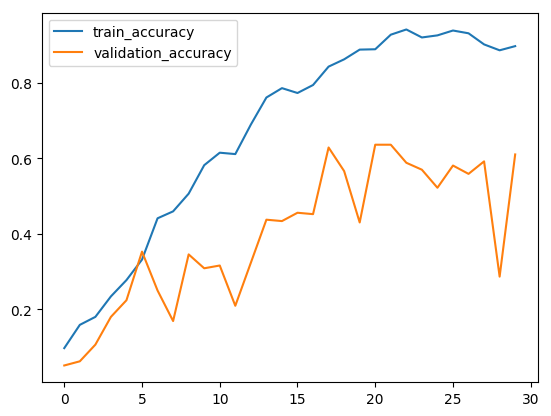

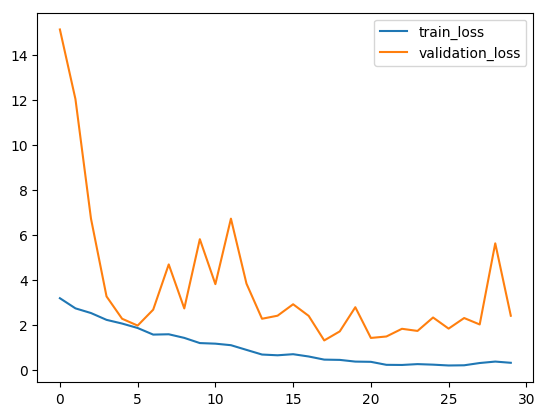

In [44]:
plt.plot(history.history["acc"],label="train_accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="validation_loss")
plt.legend()
plt.show()

## Transfer Learning

In [45]:
#read the imagenet pretrained VGG16 without the dense layers
core = VGG16(weights="imagenet",input_shape=(64,64,3),include_top=False)

#add the dense layers by functional api
x = layers.Flatten()(core.output)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(17)(x)
outputs = layers.Activation("softmax")(x)

#compile model
model = Model(inputs=core.input,outputs=outputs)

#freeze the core model layer
for layer in core.layers:
    layer.trainable = False
    
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["acc"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [46]:
history2 = model.fit(train_x,train_y,validation_data=(valid_x,valid_y),batch_size=64, epochs=30)

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - 5s 5ms/step - loss: 2.8155 - acc: 0.1213 - val_loss: 2.1837 - val_acc: 0.4522
Epoch 2/30
1088/1088 [==============================] - 1s 1ms/step - loss: 2.0938 - acc: 0.3392 - val_loss: 1.6361 - val_acc: 0.5257
Epoch 3/30
1088/1088 [==============================] - 1s 1ms/step - loss: 1.6940 - acc: 0.4632 - val_loss: 1.3876 - val_acc: 0.5625
Epoch 4/30
1088/1088 [==============================] - 1s 1ms/step - loss: 1.4230 - acc: 0.5257 - val_loss: 1.2415 - val_acc: 0.6654
Epoch 5/30
1088/1088 [==============================] - 1s 1ms/step - loss: 1.1915 - acc: 0.6186 - val_loss: 1.1305 - val_acc: 0.6544
Epoch 6/30
1088/1088 [==============================] - 1s 1ms/step - loss: 1.0409 - acc: 0.6682 - val_loss: 1.0614 - val_acc: 0.6728
Epoch 7/30
1088/1088 [==============================] - 1s 1ms/step - loss: 0.9142 - acc: 0.7022 - val_loss: 0.9794 - val_acc: 0.7059
Epoch 8/30
1088

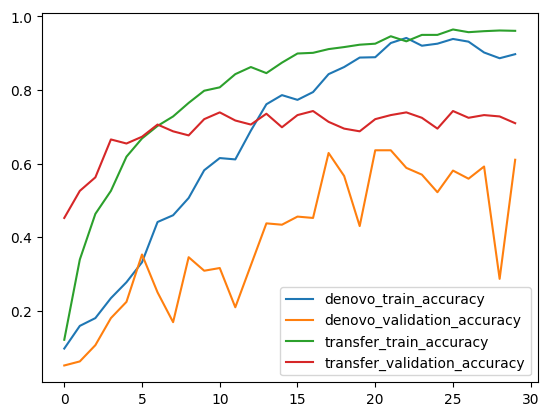

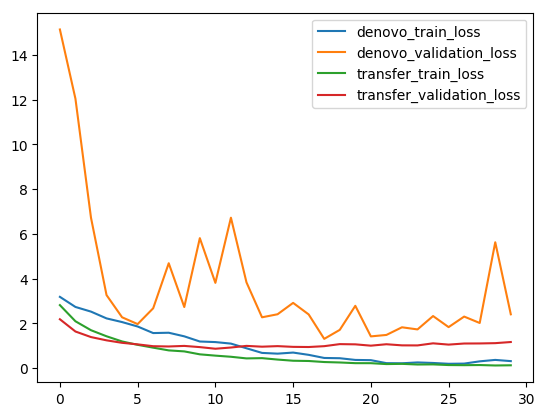

In [50]:
plt.plot(history.history["acc"],label="denovo_train_accuracy")
plt.plot(history.history["val_acc"],label="denovo_validation_accuracy")
plt.plot(history2.history["acc"],label="transfer_train_accuracy")
plt.plot(history2.history["val_acc"],label="transfer_validation_accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="denovo_train_loss")
plt.plot(history.history["val_loss"],label="denovo_validation_loss")
plt.plot(history2.history["loss"],label="transfer_train_loss")
plt.plot(history2.history["val_loss"],label="transfer_validation_loss")
plt.legend()
plt.show()


## Fine Tuning

In [48]:
#read the imagenet pretrained VGG16 without the dense layers
core = VGG16(weights="imagenet",input_shape=(64,64,3),include_top=False)

#add the dense layers by functional api
x = layers.Flatten()(core.output)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(17)(x)
outputs = layers.Activation("softmax")(x)

#compile model
model = Model(inputs=core.input,outputs=outputs)

#freeze the core model layer
for layer in core.layers:
    layer.trainable = False
    
model.compile(loss="categorical_crossentropy",optimizer="rmsprop", metrics=["acc"])
model.fit(train_x,train_y,validation_data=(valid_x,valid_y),batch_size=60, epochs=2)

#fine tune the entire model
for layer in core.layers:
    layer.trainable=True
model.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.SGD(0.0001,momentum=0.1), metrics=["acc"])

history3 = model.fit(train_x,train_y,validation_data=(valid_x,valid_y),batch_size=60, epochs=30)

Train on 1088 samples, validate on 272 samples
Epoch 1/2
1088/1088 [==============================] - 5s 5ms/step - loss: 2.7498 - acc: 0.1608 - val_loss: 2.2590 - val_acc: 0.2316
Epoch 2/2
1088/1088 [==============================] - 1s 1ms/step - loss: 2.0675 - acc: 0.3263 - val_loss: 2.0362 - val_acc: 0.3272
Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - 8s 7ms/step - loss: 2.0168 - acc: 0.3676 - val_loss: 1.7411 - val_acc: 0.4743
Epoch 2/30
1088/1088 [==============================] - 3s 3ms/step - loss: 1.8512 - acc: 0.4108 - val_loss: 1.6745 - val_acc: 0.5074
Epoch 3/30
1088/1088 [==============================] - 3s 3ms/step - loss: 1.7783 - acc: 0.4320 - val_loss: 1.6249 - val_acc: 0.5147
Epoch 4/30
1088/1088 [==============================] - 3s 3ms/step - loss: 1.7747 - acc: 0.4522 - val_loss: 1.5929 - val_acc: 0.5294
Epoch 5/30
1088/1088 [==============================] - 3s 3ms/step - loss: 1.7173 - acc: 0.4522 - val_l

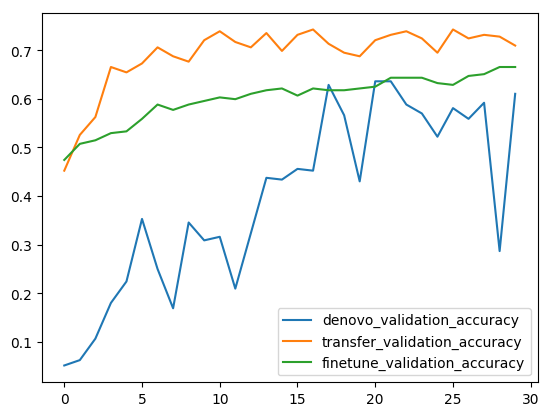

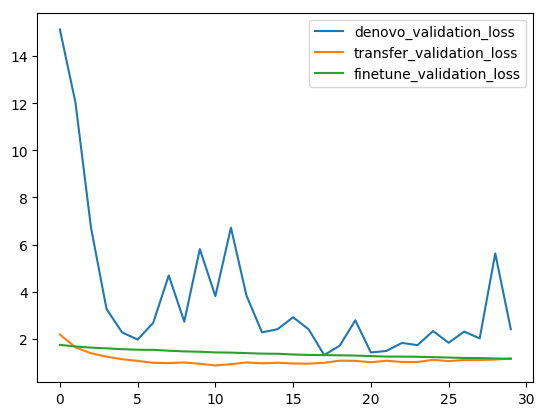

In [51]:
#plt.plot(history.history["acc"],label="denovo_train_accuracy")
plt.plot(history.history["val_acc"],label="denovo_validation_accuracy")
#plt.plot(history2.history["acc"],label="transfer_train_accuracy")
plt.plot(history2.history["val_acc"],label="transfer_validation_accuracy")
#plt.plot(history3.history["acc"],label="finetune_train_accuracy")
plt.plot(history3.history["val_acc"],label="finetune_validation_accuracy")

plt.legend()
plt.show()

#plt.plot(history.history["loss"],label="denovo_train_loss")
plt.plot(history.history["val_loss"],label="denovo_validation_loss")
#plt.plot(history2.history["loss"],label="transfer_train_loss")
plt.plot(history2.history["val_loss"],label="transfer_validation_loss")
#plt.plot(history3.history["loss"],label="finetune_train_loss")
plt.plot(history3.history["val_loss"],label="finetune_validation_loss")

plt.legend()
plt.show()


# Postface

We can see that fine tuning and transfer learning can greatly enhance the performance (speed of training and accruacy) of classification. 

For training speed, we have resized the input to 64 by 64. The difference between de novo and fine tuning elucidates in larger input size.

Increasing the input size for the CNN and Data Augmentation can further enhance the accuracy.
Try for your self below if you are interested!

hints

- for increasing the input size of the network, modify either the below

- - for de novo training
- - - layers.Conv2D(64,(3,3),padding="same",name="block1_conv1",input_shape=(64,64,3)),
- - for fine tuning or transfer learning
- - core = VGG16(weights="imagenet",input_shape=(64,64,3),include_top=False)

** be aware that increasing the input size may exceed the GPU memory available, incase of error, decrease the batchsize from 64 to 32, 16 or smaller ** 

- - for data augmentation
- - - refer to ImageDataGenerator
- - - use the model.fit_generator